In [19]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from svd_compression import calculate_singular_values, compress_matrix

In [20]:
def random_matrix(n, p=0):
    r_matrix = np.random.uniform(0, 1, (n, n))
    for ind in np.random.permutation(range(n*n))[:int(n*n*p)]:
        r_matrix[ind // n, ind % n] = 0
    return r_matrix

In [21]:
def plot_singular_values(values):
    plt.plot(values)

In [22]:
eps = 1e-12

[[0.         0.         0.         ... 0.98807448 0.         0.        ]
 [0.         0.09106755 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


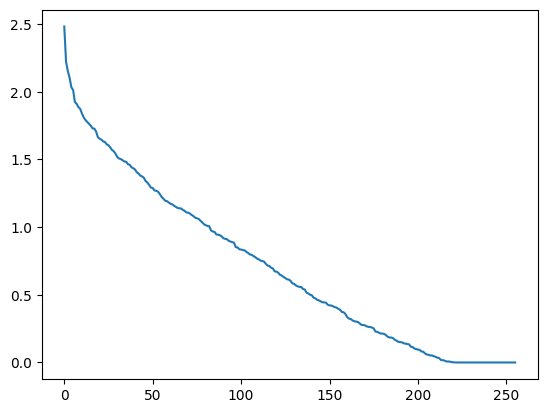

In [23]:
mat = random_matrix(256, 0.99)
v = calculate_singular_values(mat)
plot_singular_values(v)
print(mat)

In [24]:
image_mat = np.full((256, 256), 255)
tree = compress_matrix(mat, v[128], 4)
image = Image.fromarray(image_mat)

In [25]:
mat2 = tree.eval()
print(np.max(mat2 - mat))

0.29305698813373054


In [26]:
from Tree import InternalNode, Leaf

In [27]:
def max_depth(root):
    if isinstance(root, Leaf):
        return 0
    else:
        max_value = 1 + max(max_depth(root.left_up), max_depth(root.right_up), max_depth(root.left_low), max_depth(root.right_low))
        return max_value

In [28]:
def get_print_sizes(size, root):
    max_d = max_depth(root)
    
    print_sizes = []
    
    current_size = size // (2 ** max_d)
    
    for _ in range(max_d + 1):
        print_sizes.append(current_size)
        
        current_size = 2 * print_sizes[-1] + 1
    
    return print_sizes[::-1]

In [29]:
print_sizes = get_print_sizes(256, tree.root)
print(print_sizes)

[271, 135, 67, 33, 16]


In [30]:
def printer(root, depth=0):
    if isinstance(root, Leaf):
        size = print_sizes[depth]
        if root.zeros:
            array = np.ones((size, size))
        else:
            array = np.zeros((size, size))
            k = root.V.shape[0]
            array[k:, k:] = np.ones((size - k, size - k))
        
        return array
    else:
        top_left = printer(root.left_up, depth + 1)
        top_right = printer(root.right_up, depth + 1)
        bottom_left = printer(root.left_low, depth + 1)
        bottom_right = printer(root.right_low, depth + 1)

        
        size = print_sizes[depth]
        
        base = np.ones((size, size)) * 0.5
        k = size // 2
        
        base[:k, :k] = top_left
        base[:k, k + 1:] = top_right
        base[k + 1:, :k] = bottom_left
        base[k + 1:, k + 1:] = bottom_right
        
        return base

In [31]:
image = printer(tree.root) * 255

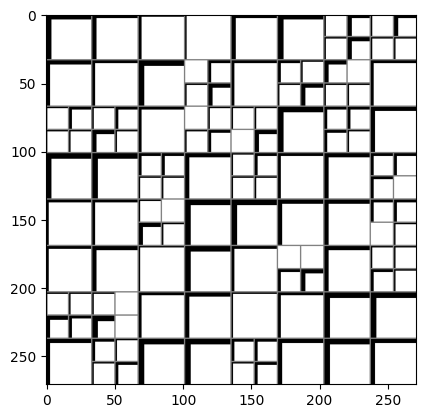

In [32]:
plt.imshow(image)
plt.gray()
plt.show()

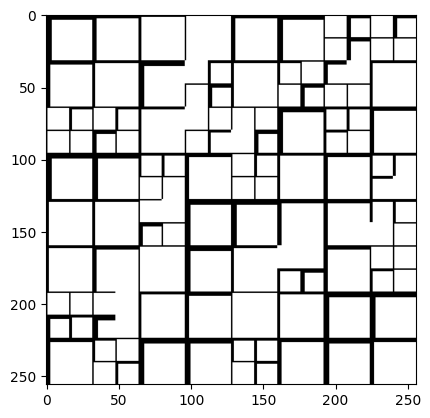

In [35]:
plt.imshow(Image.fromarray(tree.draw()))

W sumie to samo wyszło